# Hierarchial Clustering

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('mall.csv')

In [12]:
data.shape

(200, 5)

In [14]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [24]:
x = data.iloc[:, [3, 4]].values
print(x.shape)

(200, 2)


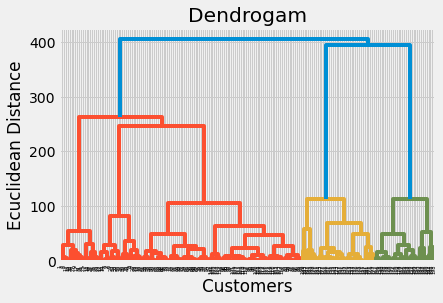

In [32]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogam')
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

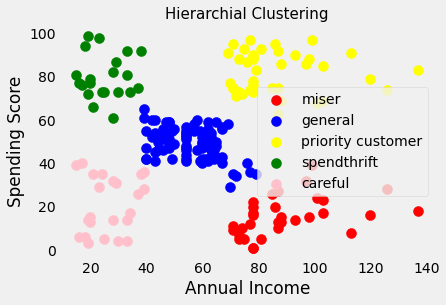

In [31]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'miser')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'general')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'yellow', label = 'priority customer')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'green', label = 'spendthrift')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'pink', label = 'careful')

plt.title('Hierarchial Clustering', fontsize = 15)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

# Text Analysis and Topic Modelling

In [33]:
papers  = pd.read_csv('papers.csv')

In [34]:
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [35]:
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
papers.head()

,year,title,abstract,paper_text
5360,2015,Learning to Segment Object Candidates,Recent object detection systems rely on two cr...,Learning to Segment Object Candidates\n\nPedro...
3602,2011,Beyond Spectral Clustering - Tight Relaxations...,Spectral clustering is based on the spectral r...,Beyond Spectral Clustering - Tight Relaxations...
5007,2014,Mode Estimation for High Dimensional Discrete ...,This paper studies the following problem: give...,Mode Estimation for High Dimensional Discrete ...
2785,2008,Finding Latent Causes in Causal Networks: an E...,Causal structure-discovery techniques usually ...,Finding Latent Causes in Causal Networks:\nan ...
3727,2011,Data Skeletonization via Reeb Graphs,Recovering hidden structure from complex and n...,Data Skeletonization via Reeb Graphs\n\nXiaoyi...


In [36]:
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

5360    learning to segment object candidates\n\npedro...
3602    beyond spectral clustering - tight relaxations...
5007    mode estimation for high dimensional discrete ...
2785    finding latent causes in causal networks:\nan ...
3727    data skeletonization via reeb graphs\n\nxiaoyi...
Name: paper_text_processed, dtype: object

In [38]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


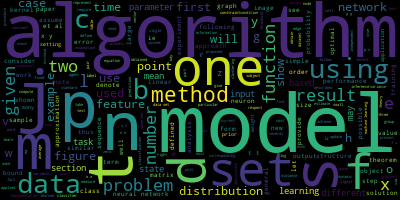

In [40]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=1000, contour_width=3, contour_color='yellow')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [41]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]


data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['learning', 'segment', 'object', 'candidates', 'pedro', 'pinheiro', 'ronan', 'collobert', 'piotr', 'dollar', 'pedro', 'opinheirocom', 'locronan', 'fbcom', 'pdollar', 'fbcom', 'facebook', 'ai', 'research', 'abstract', 'recent', 'object', 'detection', 'systems', 'rely', 'two', 'critical', 'steps', 'set', 'object']


In [42]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 4), (1, 1), (2, 2), (3, 5), (4, 1), (5, 1), (6, 3), (7, 3), (8, 1), (9, 6), (10, 2), (11, 2), (12, 1), (13, 1), (14, 3), (15, 1), (16, 3), (17, 1), (18, 1), (19, 1), (20, 1), (21, 6), (22, 1), (23, 1), (24, 1), (25, 3), (26, 3), (27, 1), (28, 1), (29, 1)]


In [43]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.007*"learning" + 0.006*"model" + 0.005*"algorithm" + 0.005*"data" + '
  '0.005*"set" + 0.004*"time" + 0.004*"using" + 0.004*"problem" + '
  '0.004*"given" + 0.004*"one"'),
 (1,
  '0.009*"model" + 0.008*"algorithm" + 0.006*"data" + 0.006*"learning" + '
  '0.006*"set" + 0.004*"function" + 0.004*"one" + 0.004*"figure" + '
  '0.003*"using" + 0.003*"two"'),
 (2,
  '0.006*"set" + 0.005*"model" + 0.005*"learning" + 0.005*"algorithm" + '
  '0.004*"data" + 0.004*"using" + 0.004*"features" + 0.003*"one" + '
  '0.003*"also" + 0.003*"number"'),
 (3,
  '0.006*"learning" + 0.006*"model" + 0.005*"one" + 0.005*"algorithm" + '
  '0.005*"data" + 0.004*"function" + 0.004*"set" + 0.003*"problem" + '
  '0.003*"figure" + 0.003*"using"'),
 (4,
  '0.008*"model" + 0.005*"data" + 0.004*"function" + 0.004*"algorithm" + '
  '0.004*"two" + 0.004*"one" + 0.004*"learning" + 0.004*"set" + 0.003*"using" '
  '+ 0.003*"models"'),
 (5,
  '0.006*"learning" + 0.005*"data" + 0.005*"one" + 0.004*"set" + '
  '0.004*

In [45]:
pip install pyLDAvis


  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136882 sha256=3b0e7f948e80f63edac0bef982490d38015b8c9cc9c80ff11616fa38e3c258ad
  Stored in directory: c:\users\moham\appdata\local\pip\cache\wheels\57\a4\86\d10c6c2e0bf149fbc0afb0aa5a6528ac35b30a133a0270c477
Note: you may need to restart the kernel to use updated packages.
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=36a42720198ce12424d652560b31274f2235d8663fe1b269c333a7ac6abc9f25
  Stored in directory: c:\users\moham\appdata\local\pip\cache\wheels\e4\7b\

In [52]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models

In [54]:
import os
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './'+ str(num_topics) +'.html')

LDAvis_prepared

D:\Anaconda\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.002194  0.002737       1        1  19.812640
9      0.004787 -0.000499       2        1  16.071166
1      0.000835 -0.008448       3        1  15.260617
7     -0.004217 -0.003398       4        1  10.519007
4     -0.000017  0.005547       5        1   9.162213
8      0.003673 -0.004966       6        1   8.340985
5      0.000493  0.002938       7        1   8.307140
2     -0.012735  0.001076       8        1   7.321058
6      0.005265  0.003804       9        1   3.110735
3     -0.000278  0.001209      10        1   2.094439, topic_info=           Term         Freq        Total Category  logprob  loglift
498    learning  1432.000000  1432.000000  Default  30.0000  30.0000
617         one   843.000000   843.000000  Default  29.0000  29.0000
25    algorithm  1245.000000  1245.000000  Default  28.0000  28.0000
192        data  1344.000000  1344.000000  Default  27.0000  27.0000
571       model  1457.000000  1457.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
604      number    11.182704   658.114190  Topic10  -6.0612  -0.2091
950        used     9.432118   498.714712  Topic10  -6.2315  -0.1020
593      neural     9.760522   575.954240  Topic10  -6.1972  -0.2118
26   algorithms     9.518630   518.574225  Topic10  -6.2223  -0.1319
381       given     9.850621   623.229200  Topic10  -6.1880  -0.2815

[876 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
3677      1  0.074688  abcd
3677      2  0.298753  abcd
3677      3  0.074688  abcd
3677      4  0.074688  abcd
3677      5  0.149376  abcd
...     ...       ...   ...
9246      2  0.245900   znj
9246      3  0.368850   znj
9246      4  0.122950   znj
9246      6  0.122950   znj
9246      7  0.122950   znj

[3964 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 10, 2, 8, 5, 9, 6, 3, 7, 4])